<div align="center">
  <b> <font size="6"> Hyperparameter Tuning for Multiple Regression </font> </b>
</div>

We will find optimal number of features using recursive feature elimination (RFE) and k-fold cross validation.

In [56]:
# Import necessary package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings # supress warnings
warnings.filterwarnings('ignore')

### Step 1: Load the dataset

In [57]:
df = pd.read_csv('E:\\MY LECTURES\\DATA SCIENCE\\3.Programs\\dataset\\Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


### Step 2: Apply EDA

Univariate and bivariate analysis

### Step 3. Pre-process and extract the features

In [58]:
# data preparation - list of all the "yes-no" binary categorical variables
# we will map yes to 1 and no to 0
binary_vars_list =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# applying the function to the housing variables list
df[binary_vars_list] = df[binary_vars_list].apply(binary_map)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [59]:
# 'dummy' variables
# get dummy variables for 'furnishingstatus' 
# also, drop the first column of the resulting df (since n-1 dummy vars suffice)
status = pd.get_dummies(df['furnishingstatus'], drop_first = True)
status.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [60]:
# concat the dummy variable df with the main df
df = pd.concat([df, status], axis = 1)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [61]:
# remove 'furnishingstatus' since we alreday have the dummy vars
df.drop(['furnishingstatus'], axis = 1, inplace = True)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [62]:
# extracting relevant features
numeric_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']
temp = df[numeric_vars]
temp.head()

,area,bedrooms,bathrooms,stories,parking,price
0,7420,4,2,3,2,13300000
1,8960,4,4,4,3,12250000
2,9960,3,2,2,2,12250000
3,7500,4,2,2,3,12215000
4,7420,4,1,2,2,11410000


In [63]:
# pre-process: Scale the values of those features between 0 and 1
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()
temp1 = scaler.fit_transform(temp)
temp1 = pd.DataFrame(temp1,columns=['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price'])
temp1.head()

,area,bedrooms,bathrooms,stories,parking,price
0,0.396564,0.6,0.333333,0.666667,0.666667,1.000000
1,0.502405,0.6,1.000000,1.000000,1.000000,0.909091
2,0.571134,0.4,0.333333,0.333333,0.666667,0.909091
3,0.402062,0.6,0.333333,0.333333,1.000000,0.906061
4,0.396564,0.6,0.000000,0.333333,0.666667,0.836364


In [64]:
df1 = df[["mainroad","guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea", "semi-furnished"]] 
df1.head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,semi-furnished
0,1,0,0,0,1,1,0
1,1,0,0,0,1,0,0
2,1,0,1,0,0,1,1
3,1,0,1,0,1,1,0
4,1,1,1,0,1,0,0


In [65]:
pre_processed_data = pd.concat([df1,temp1],axis=1)
pre_processed_data.head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,semi-furnished,area,bedrooms,bathrooms,stories,parking,price
0,1,0,0,0,1,1,0,0.396564,0.6,0.333333,0.666667,0.666667,1.000000
1,1,0,0,0,1,0,0,0.502405,0.6,1.000000,1.000000,1.000000,0.909091
2,1,0,1,0,0,1,1,0.571134,0.4,0.333333,0.333333,0.666667,0.909091
3,1,0,1,0,1,1,0,0.402062,0.6,0.333333,0.333333,1.000000,0.906061
4,1,1,1,0,1,0,0,0.396564,0.6,0.000000,0.333333,0.666667,0.836364


In [66]:
pre_processed_data.shape

(545, 13)

### Step 4. Split the data for training and testing

In [67]:
# split into train and test
from sklearn.model_selection import train_test_split
train, test = train_test_split(pre_processed_data, train_size = 0.8, test_size = 0.2, random_state = 100)

In [68]:
# divide into x_train, y_train, x_test, y_test
y_train = train.pop('price')
x_train = train

y_test = test.pop('price')
x_test = test

#### Using RFE (recursive feature elimination ) to find optimal number of features

Now, we have 13 input features. To build the model using RFE, we need to tell RFE how many features we want in the final model. It then runs a feature elimination algorithm. 

Note that the number of features to be used in the model is a **hyperparameter**.

In [69]:
# num of max features
len(x_train.columns)

12

##### demanding 10 features

In [70]:
# first model with an arbitrary choice of n_features (say 10) using Recursive Feature Elimination (RFE) 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm = LinearRegression() 

rfe = RFE(lm, n_features_to_select = 10)     

rfe = rfe.fit(x_train, y_train)

In [71]:
# tuples of (feature name, whether selected, ranking)
# note that the 'rank' is > 1 for non-selected features
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('mainroad', True, 1),
 ('guestroom', True, 1),
 ('basement', False, 2),
 ('hotwaterheating', True, 1),
 ('airconditioning', True, 1),
 ('prefarea', True, 1),
 ('semi-furnished', False, 3),
 ('area', True, 1),
 ('bedrooms', True, 1),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('parking', True, 1)]

In [72]:
import sklearn.metrics

# predict prices of X_test
y_pred = rfe.predict(x_test)

# evaluate the model on test set
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print("R2 score for 10 features is ", np.round(r2,2)*100,"%")

R2 score for 10 features is  66.0 %


##### demanding 6 features

In [73]:
# try with another value of RFE

rfe = RFE(lm, n_features_to_select = 6)             
rfe = rfe.fit(x_train, y_train)

# predict prices of X_test
y_pred = rfe.predict(x_test)

# evaluate the model on test set
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print("R2 score for 6 features is ", np.round(r2,2)*100,"%")

R2 score for 6 features is  61.0 %


#### Using k-fold cross-validation  

In [74]:
# number of features in X_train
len(x_train.columns)

12

In [75]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 14))}]

# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, param_grid = hyper_params, scoring= 'r2', cv = folds, verbose = 1, return_train_score=True)      

# fit the model
model_cv.fit(x_train, y_train)  

Fitting 5 folds for each of 13 candidates, totalling 65 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:    0.6s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13]}],
             return_train_score=True, scoring='r2', verbose=1)

In [76]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.010394,0.001020,0.002399,4.893565e-04,1,{'n_features_to_select': 1},0.276949,0.387262,0.100131,0.296618,...,0.251887,0.096787,13,0.280964,0.233348,0.315899,0.270183,0.300176,0.280114,0.028176
1,0.010787,0.003189,0.002399,4.897265e-04,2,{'n_features_to_select': 2},0.429683,0.556214,0.406671,0.508769,...,0.462183,0.059862,12,0.491680,0.447678,0.492970,0.471062,0.496231,0.479924,0.018399
2,0.009394,0.001021,0.001999,6.315051e-04,3,{'n_features_to_select': 3},0.495335,0.585472,0.491629,0.550714,...,0.523759,0.037856,11,0.549716,0.519267,0.546667,0.533585,0.548466,0.539540,0.011666
3,0.008196,0.000748,0.001799,3.998047e-04,4,{'n_features_to_select': 4},0.533694,0.612475,0.481561,0.548044,...,0.536108,0.044583,10,0.597053,0.571504,0.551180,0.540888,0.573760,0.566877,0.019500
4,0.008156,0.003756,0.001208,9.861814e-04,5,{'n_features_to_select': 5},0.531246,0.625839,0.531517,0.518539,...,0.542786,0.042524,9,0.600922,0.584481,0.596180,0.604684,0.611186,0.599491,0.008967
5,0.009488,0.006468,0.001207,9.855652e-04,6,{'n_features_to_select': 6},0.548520,0.634265,0.550628,0.529404,...,0.552411,0.044890,8,0.623425,0.599596,0.606989,0.635190,0.620695,0.617179,0.012560
6,0.006742,0.005462,0.001599,7.997275e-04,7,{'n_features_to_select': 7},0.572115,0.669321,0.588741,0.555967,...,0.596075,0.039000,7,0.632366,0.626130,0.634878,0.647244,0.648303,0.637784,0.008646
7,0.005597,0.000489,0.001999,7.478899e-07,8,{'n_features_to_select': 8},0.582022,0.674105,0.616321,0.572281,...,0.608162,0.036143,6,0.641664,0.640590,0.644835,0.658142,0.662905,0.649627,0.009131
8,0.004523,0.000445,0.002399,4.898045e-04,9,{'n_features_to_select': 9},0.567159,0.678084,0.643983,0.601480,...,0.617711,0.038855,5,0.661629,0.641990,0.654508,0.666207,0.676354,0.660138,0.011516
9,0.004397,0.000489,0.001599,4.896873e-04,10,{'n_features_to_select': 10},0.595612,0.686668,0.660261,0.609489,...,0.632374,0.034953,4,0.680275,0.653070,0.663458,0.667128,0.679152,0.668617,0.010173


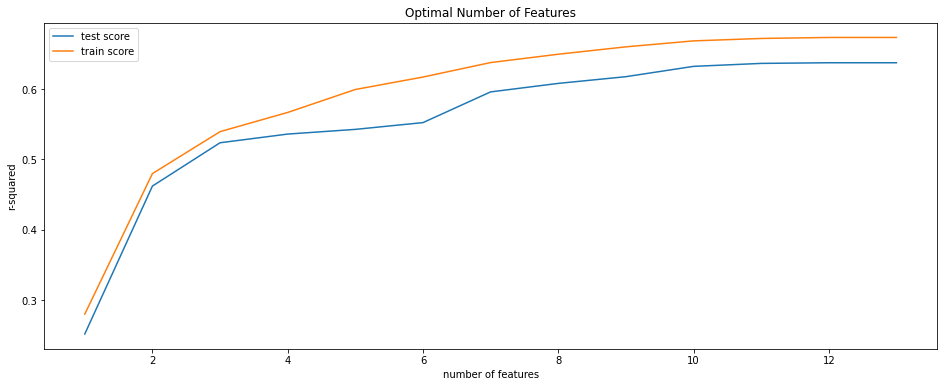

In [77]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

From the graph above, we can observe that R_square value keeps increasing as we incrementally add features. <br>

After adding 12 features, there is no much increase in the socre. Therefore, we can select first 10 features for building the model. 

In [78]:
# final model
n_features_optimal = 10

lm = LinearRegression()

rfe = RFE(lm, n_features_to_select = n_features_optimal)             
rfe = rfe.fit(x_train, y_train)

# predict prices of x_test
y_pred = rfe.predict(x_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

0.656129343365103


Notice that the test score is very close to the 'mean test score' on the k-folds (about 60%). In general, the mean score estimated by CV will usually be a good estimate of the test score. 